In [1]:
%matplotlib inline

import dipde
import matplotlib.pyplot as plt
assert dipde.__version__ == '0.2.1'

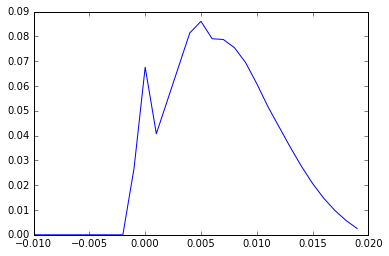

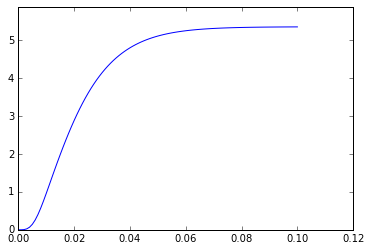

In [5]:

import numpy as np 
from dipde.internals.internalpopulation import InternalPopulation
from dipde.internals.externalpopulation import ExternalPopulation
from dipde.internals.simulationconfiguration import SimulationConfiguration
from dipde.internals.network import Network
from dipde.internals.simulation import Simulation
from dipde.internals.connection import Connection as Connection
import scipy.stats as sps
from dipde.interfaces.zmq import RequestFiringRate, ReplyServerThread
from dipde.interfaces.zmq import PublishCallbackConnect, CallbackSubscriberThread
from dipde.interfaces.zmq import context as zmq_context
import time
import logging
import os
logging.disable(logging.CRITICAL)

# Settings:
t0 = 0.
dt = .001
dv = .001
v_min = -.01
v_max = .02
tf = .1
tau_m=.02
p0=((0.,),(1.,))
weights={'distribution':'delta', 'weight':.005}
bgfr=100
update_method='approx'

# Create simulation:
b1 = ExternalPopulation(bgfr)
i1 = InternalPopulation(v_min=v_min, tau_m=tau_m, v_max=v_max, dv=dv, update_method=update_method, p0=p0)
b1_i1 = Connection(b1, i1, 1, weights=weights)
network = Network([b1, i1], [b1_i1])
simulation_configuration = SimulationConfiguration(dt, tf, t0=t0)
simulation = Simulation(network=network, simulation_configuration=simulation_configuration)
simulation.run()

i1.plot_probability_distribution()
i1.plot()

plt.show()